<a href="https://colab.research.google.com/github/kazimovmirkazim/Computer-Vision/blob/main/CNN_scaling_up_and_error_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt


In [ ]:
!wget https://raw.githubusercontent.com/databyhuseyn/DeepLearning/refs/heads/main/helper_functions.py

--2025-08-18 15:23:22--  https://raw.githubusercontent.com/databyhuseyn/DeepLearning/refs/heads/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2025-08-18 15:23:22 (97.4 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import create_tensorboard_callback,plot_loss_curves,unzip_data,walk_through_dir

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip

unzip_data("101_food_classes_10_percent.zip")

train_dir = "101_food_classes_10_percent/train/"

test_dir = "101_food_classes_10_percent/test/"

--2025-08-18 15:23:29--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.207, 142.250.101.207, 142.251.2.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G   132MB/s    in 8.0s    

2025-08-18 15:23:37 (193 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



In [ ]:
import tensorflow as tf

IMG_SIZE = (224,224)
batch_size = 32

train_data_all_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                image_size=IMG_SIZE,
                                                                                label_mode='categorical',
                                                                                batch_size= batch_size)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode='categorical',
                                                                shuffle= False)

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


In [ ]:
walk_through_dir('/content/101_food_classes_10_percent')

There are 2 directories and 0 images in '/content/101_food_classes_10_percent'.
There are 101 directories and 0 images in '/content/101_food_classes_10_percent/test'.
There are 0 directories and 250 images in '/content/101_food_classes_10_percent/test/beignets'.
There are 0 directories and 250 images in '/content/101_food_classes_10_percent/test/baby_back_ribs'.
There are 0 directories and 250 images in '/content/101_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '/content/101_food_classes_10_percent/test/risotto'.
There are 0 directories and 250 images in '/content/101_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '/content/101_food_classes_10_percent/test/tacos'.
There are 0 directories and 250 images in '/content/101_food_classes_10_percent/test/gyoza'.
There are 0 directories and 250 images in '/content/101_food_classes_10_percent/test/club_sandwich'.
There are 0 directories and 250 images in '/content/101_fo

In [ ]:
data_augmentation =  tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomWidth(0.2)
], name= 'data_augmentation')

In [ ]:
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from os import name
input_shape= (224,224,3)
inputs = tf.keras.layers.Input(shape=input_shape,name='input_layer')
x= data_augmentation(inputs)
x= base_model(x,training=False)
x= tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
outputs = tf.keras.layers.Dense(len(train_data_all_10_percent.class_names),activation='softmax',name='output_layer')(x)

model_0 = tf.keras.Model(inputs,outputs)

In [ ]:
model_0.compile(loss='categorical_crossentropy',
                optimizer= tf.keras.optimizers.Adam(learning_rate=1e-3),
                metrics=['accuracy'])

In [ ]:
history_0= model_0.fit(train_data_all_10_percent,
                       epochs=5,
                       steps_per_epoch=int(len(train_data_all_10_percent)),
                       validation_data = test_data,
                       validation_steps= int ((0.25 * len(test_data))))

Epoch 1/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 108s 375ms/step - accuracy: 0.1255 - loss: 4.0923 - val_accuracy: 0.3461 - val_loss: 2.8860
Epoch 2/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 117s 291ms/step - accuracy: 0.4065 - loss: 2.6176 - val_accuracy: 0.4226 - val_loss: 2.3553
Epoch 3/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 76s 265ms/step - accuracy: 0.4901 - loss: 2.1624 - val_accuracy: 0.4667 - val_loss: 2.0892
Epoch 4/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 56s 236ms/step - accuracy: 0.5360 - loss: 1.9427 - val_accuracy: 0.4929 - val_loss: 1.9936
Epoch 5/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 82s 346ms/step - accuracy: 0.5609 - loss: 1.8034 - val_accuracy: 0.5054 - val_loss: 1.9040


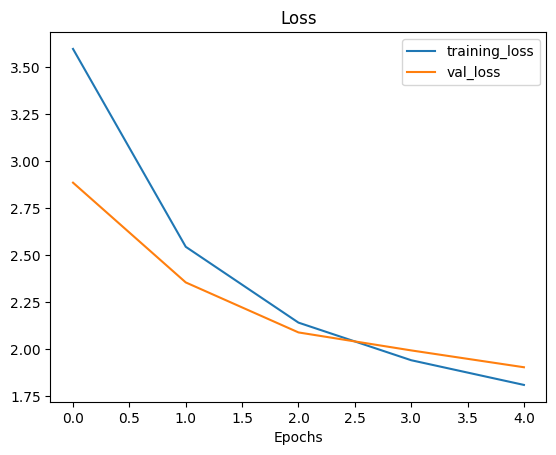

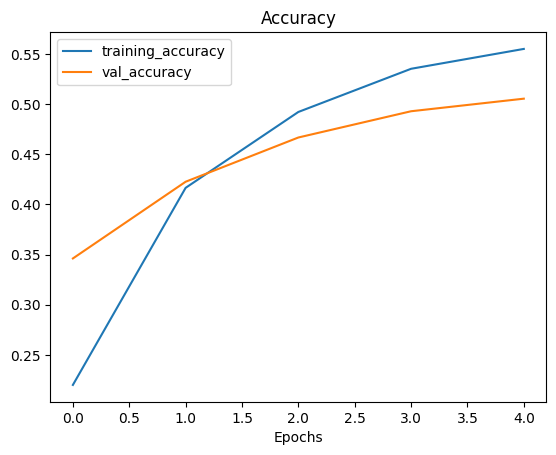

In [ ]:
plot_loss_curves(history_0)

In [ ]:
model_0_best_model = model_0.layers[2]

In [ ]:
model_0_best_model.trainable= False

In [ ]:
for layer in (model_0_best_model.layers[-5:]):
  layer.trainable= True

In [ ]:
for layer_number,layer in  enumerate(model_0_best_model.layers):
  print(layer_number,'|',layer.name,'|',layer.trainable)

0 | input_layer | False
1 | rescaling | False
2 | normalization | False
3 | stem_conv | False
4 | stem_bn | False
5 | stem_activation | False
6 | block1a_project_conv | False
7 | block1a_project_bn | False
8 | block1a_project_activation | False
9 | block2a_expand_conv | False
10 | block2a_expand_bn | False
11 | block2a_expand_activation | False
12 | block2a_project_conv | False
13 | block2a_project_bn | False
14 | block2b_expand_conv | False
15 | block2b_expand_bn | False
16 | block2b_expand_activation | False
17 | block2b_project_conv | False
18 | block2b_project_bn | False
19 | block2b_drop | False
20 | block2b_add | False
21 | block3a_expand_conv | False
22 | block3a_expand_bn | False
23 | block3a_expand_activation | False
24 | block3a_project_conv | False
25 | block3a_project_bn | False
26 | block3b_expand_conv | False
27 | block3b_expand_bn | False
28 | block3b_expand_activation | False
29 | block3b_project_conv | False
30 | block3b_project_bn | False
31 | block3b_drop | False
32 

In [ ]:
model_0.compile(loss='categorical_crossentropy',
                optimizer= tf.keras.optimizers.Adam(learning_rate=1e-4),
                metrics=['accuracy'])

In [ ]:
checkpoint_path= "101_classes_10_percent_data_model_checkpoint.weights.h5"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         save_weights_only=True,
                                                         monitor="val_accuracy",
                                                         save_best_only=True)

In [ ]:
fine_tune_epochs = 10

history_all_classes_10_percent_fine_tune = model_0.fit(train_data_all_10_percent,
                                                       epochs=fine_tune_epochs,
                                                       steps_per_epoch= int (len(train_data_all_10_percent)),
                                                       validation_data= test_data,
                                                       validation_steps = int ((0.25 * len(test_data))),
                                                       initial_epoch = history_0.epoch[-1],
                                                       callbacks=[checkpoint_callback])

Epoch 5/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 73s 255ms/step - accuracy: 0.5627 - loss: 1.9569 - val_accuracy: 0.4997 - val_loss: 1.9645
Epoch 6/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 80s 251ms/step - accuracy: 0.5922 - loss: 1.7660 - val_accuracy: 0.5170 - val_loss: 1.8608
Epoch 7/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 50s 210ms/step - accuracy: 0.6033 - loss: 1.6887 - val_accuracy: 0.5322 - val_loss: 1.8001
Epoch 8/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 84s 356ms/step - accuracy: 0.6193 - loss: 1.5998 - val_accuracy: 0.5341 - val_loss: 1.7756
Epoch 9/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 50s 212ms/step - accuracy: 0.6235 - loss: 1.5693 - val_accuracy: 0.5462 - val_loss: 1.7223
Epoch 10/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 46s 196ms/step - accuracy: 0.6260 - loss: 1.5107 - val_accuracy: 0.5477 - val_loss: 1.7033


In [ ]:
for layer in model_0.layers:
  print(layer.name,layer.trainable)

input_layer True
data_augmentation True
efficientnetv2-b0 False
global_average_pooling_layer True
output_layer True


In [ ]:
results_all_classes_10_percent_fine_tune = model_0.evaluate(test_data)
results_all_classes_10_percent_fine_tune

790/790 ━━━━━━━━━━━━━━━━━━━━ 55s 70ms/step - accuracy: 0.5783 - loss: 1.5985


[1.4822272062301636, 0.6026930809020996]

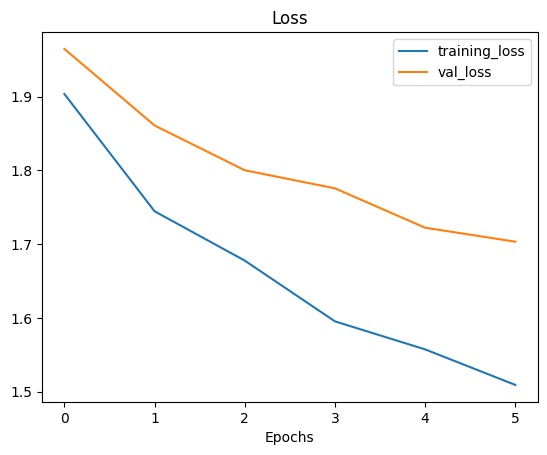

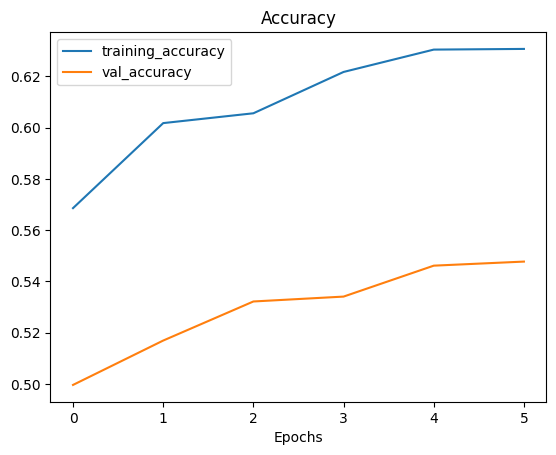

In [ ]:
plot_loss_curves(history_all_classes_10_percent_fine_tune)

In [ ]:
def compare_historys(original_history,new_history, initial_epochs=5):
  acc = original_history.history["accuracy"]
  loss = original_history.history["loss"]

  print(len(acc))

  val_acc = original_history.history["val_accuracy"]
  val_loss = original_history.history["val_loss"]

  total_acc = acc + new_history.history["accuracy"]
  total_loss = loss + new_history.history["loss"]

  total_val_acc = val_acc + new_history.history["val_accuracy"]
  total_val_loss = val_loss + new_history.history["val_loss"]

  print(len(total_acc))
  print(total_acc)

  plt.figure(figsize=(8,8))
  plt.subplot(2,1,1)
  plt.plot(total_acc,label= 'Training Accuracy')
  plt.plot(total_val_acc,label= 'Validation Accuracy')
  plt.plot([initial_epochs-1,initial_epochs-1],
           plt.ylim(),label='Start Fine Tuning')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(2,1,2)
  plt.plot(total_loss,label= 'Training Loss')
  plt.plot(total_val_loss,label= 'Validation Loss')
  plt.plot([initial_epochs-1,initial_epochs-1],
           plt.ylim(),label='Start Fine Tuning')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.show()

5
11
[0.22006601095199585, 0.41650164127349854, 0.49214521050453186, 0.5351815223693848, 0.5549834966659546, 0.5685808658599854, 0.601716160774231, 0.6055445671081543, 0.6216501593589783, 0.6303630471229553, 0.6306270360946655]


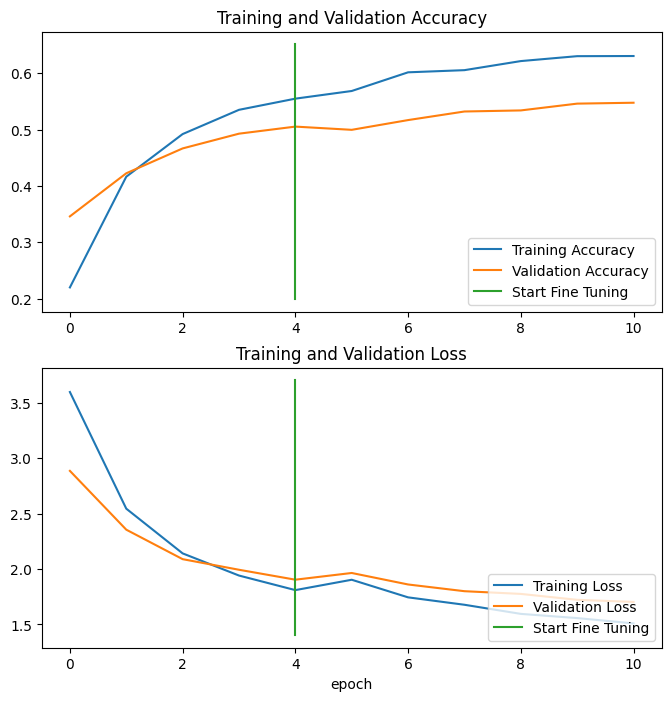

In [ ]:
compare_historys(original_history=history_0,
                 new_history=history_all_classes_10_percent_fine_tune,
                 initial_epochs=5)

In [ ]:
pred_probs = model_0.predict(test_data,verbose=1)

790/790 ━━━━━━━━━━━━━━━━━━━━ 68s 83ms/step


In [ ]:
len(pred_probs)

25250

In [ ]:
pred_probs.shape

(25250, 101)

In [ ]:
pred_probs[0]

array([4.45889868e-03, 5.20998554e-04, 1.42202288e-01, 2.50331032e-05,
       3.14581470e-04, 6.31967385e-04, 3.23001033e-04, 1.28570900e-04,
       3.47552868e-03, 4.30050446e-03, 1.12415815e-04, 2.40252019e-04,
       4.26419312e-04, 2.00940995e-04, 1.55744199e-02, 4.94123101e-02,
       2.83003063e-03, 2.43813172e-03, 1.40179805e-02, 1.80875650e-03,
       5.25698112e-03, 8.49001881e-05, 7.79629743e-04, 3.13126948e-04,
       1.50440331e-03, 7.88279809e-03, 5.50864404e-03, 2.12951782e-04,
       1.34413308e-02, 8.84087349e-04, 3.79851408e-05, 6.38142985e-04,
       1.62213128e-02, 1.52149086e-03, 1.28470780e-02, 3.95917159e-04,
       5.69421612e-03, 6.10223087e-03, 2.22025644e-02, 7.66021374e-04,
       3.64574441e-03, 1.88959797e-03, 3.85806168e-04, 1.51147437e-03,
       1.70427968e-03, 3.59678851e-03, 5.50029625e-04, 7.25773687e-04,
       1.07119547e-03, 1.89392343e-02, 1.89056958e-03, 2.89730448e-03,
       3.41735668e-02, 2.59165540e-02, 1.94882261e-04, 5.85544901e-03,
      

In [ ]:
pred_classes = pred_probs.argmax(axis=1)
pred_classes[:10]

array([85,  0,  0,  0,  8, 78, 29, 46,  9, 41])

In [ ]:
y_labels= []
for images,labels in test_data.unbatch():
  y_labels.append(labels.numpy().argmax())

In [ ]:
y_labels[:10]

[np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0)]

In [ ]:
pred_classes[:10]

array([85,  0,  0,  0,  8, 78, 29, 46,  9, 41])

In [ ]:
from sklearn.metrics import accuracy_score

sklearn_accuracy= accuracy_score(y_labels,pred_classes)

sklearn_accuracy

0.6026930693069307

In [ ]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true,y_pred,classes=None,figsize=(10,10),text_size=15,norm=False,savefig=False):
  cm= confusion_matrix(y_true,y_pred)
  cm_norm= cm.astype("float") / cm.sum(axis=1)[:,np.newaxis]
  n_classes= cm.shape[0]

  fig,ax=plt.subplots(figsize=figsize)
  cax = ax.matshow(cm,cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels= classes
  else:
    labels = np.arange(cm.shape[0])

  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel= "True label",
         xticks= np.arange(n_classes),
         yticks= np.arange(n_classes),
         xticklabels=labels,
         yticklabels=labels)
  plt.xticks(rotation=70,fontsize=text_size)
  plt.yticks(fontsize=text_size)

  threshold= (cm.max() + cm.min()) / 2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      if norm:
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                horizontalalignment="center",
                color="white" if cm[i, j] > threshold else "black",
                size=text_size)
      else:
        plt.text(j, i, f"{cm[i, j]}",
                horizontalalignment="center",
                color="white" if cm[i, j] > threshold else "black",
                size=text_size)

In [ ]:
class_names = test_data.class_names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [ ]:
make_confusion_matrix(y_true=y_labels,
                      y_pred=pred_classes,
                      classes=class_names,
                      figsize=(100,100),
                      text_size=20)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_labels,pred_classes))

              precision    recall  f1-score   support

           0       0.44      0.19      0.26       250
           1       0.60      0.70      0.65       250
           2       0.66      0.52      0.59       250
           3       0.71      0.50      0.58       250
           4       0.53      0.49      0.51       250
           5       0.55      0.38      0.45       250
           6       0.73      0.78      0.75       250
           7       0.86      0.72      0.78       250
           8       0.32      0.52      0.39       250
           9       0.35      0.77      0.48       250
          10       0.56      0.44      0.50       250
          11       0.55      0.65      0.60       250
          12       0.75      0.57      0.65       250
          13       0.54      0.60      0.57       250
          14       0.47      0.64      0.55       250
          15       0.45      0.22      0.29       250
          16       0.69      0.46      0.55       250
          17       0.46    

In [ ]:
classification_report_dict = classification_report(y_labels,pred_classes,output_dict=True)
classification_report_dict

{'0': {'precision': 0.4351851851851852,
  'recall': 0.188,
  'f1-score': 0.26256983240223464,
  'support': 250.0},
 '1': {'precision': 0.603448275862069,
  'recall': 0.7,
  'f1-score': 0.6481481481481481,
  'support': 250.0},
 '2': {'precision': 0.6649746192893401,
  'recall': 0.524,
  'f1-score': 0.5861297539149888,
  'support': 250.0},
 '3': {'precision': 0.7085714285714285,
  'recall': 0.496,
  'f1-score': 0.5835294117647059,
  'support': 250.0},
 '4': {'precision': 0.5258620689655172,
  'recall': 0.488,
  'f1-score': 0.5062240663900415,
  'support': 250.0},
 '5': {'precision': 0.5485714285714286,
  'recall': 0.384,
  'f1-score': 0.45176470588235296,
  'support': 250.0},
 '6': {'precision': 0.7320754716981132,
  'recall': 0.776,
  'f1-score': 0.7533980582524272,
  'support': 250.0},
 '7': {'precision': 0.8571428571428571,
  'recall': 0.72,
  'f1-score': 0.782608695652174,
  'support': 250.0},
 '8': {'precision': 0.3155339805825243,
  'recall': 0.52,
  'f1-score': 0.39274924471299094

In [ ]:
class_f1_scores = {}

for k, v in classification_report_dict.items():
  if k == 'accuracy':
    break
  else:
    class_f1_scores[class_names[int(k)]]= v ['f1-score']
class_f1_scores

{'apple_pie': 0.26256983240223464,
 'baby_back_ribs': 0.6481481481481481,
 'baklava': 0.5861297539149888,
 'beef_carpaccio': 0.5835294117647059,
 'beef_tartare': 0.5062240663900415,
 'beet_salad': 0.45176470588235296,
 'beignets': 0.7533980582524272,
 'bibimbap': 0.782608695652174,
 'bread_pudding': 0.39274924471299094,
 'breakfast_burrito': 0.4831038798498123,
 'bruschetta': 0.4966442953020134,
 'caesar_salad': 0.5977859778597786,
 'cannoli': 0.6485260770975056,
 'caprese_salad': 0.5687022900763359,
 'carrot_cake': 0.5457627118644067,
 'ceviche': 0.2918918918918919,
 'cheese_plate': 0.5528846153846154,
 'cheesecake': 0.45252525252525255,
 'chicken_curry': 0.49321266968325794,
 'chicken_quesadilla': 0.59375,
 'chicken_wings': 0.7026022304832714,
 'chocolate_cake': 0.5470459518599562,
 'chocolate_mousse': 0.36971046770601335,
 'churros': 0.7317073170731707,
 'clam_chowder': 0.7358490566037735,
 'club_sandwich': 0.6363636363636364,
 'crab_cakes': 0.41487839771101576,
 'creme_brulee': 0.7

In [ ]:
import pandas as pd
f1_scores = pd.DataFrame({'class_name':list(class_f1_scores.keys()),
                          'f1-score':list(class_f1_scores.values())}).sort_values('f1-score',ascending=False)
f1_scores.head()

class_name  f1-score
33            edamame  0.960630
63           macarons  0.859688
54  hot_and_sour_soup  0.841046
65            mussels  0.838298
69            oysters  0.836735

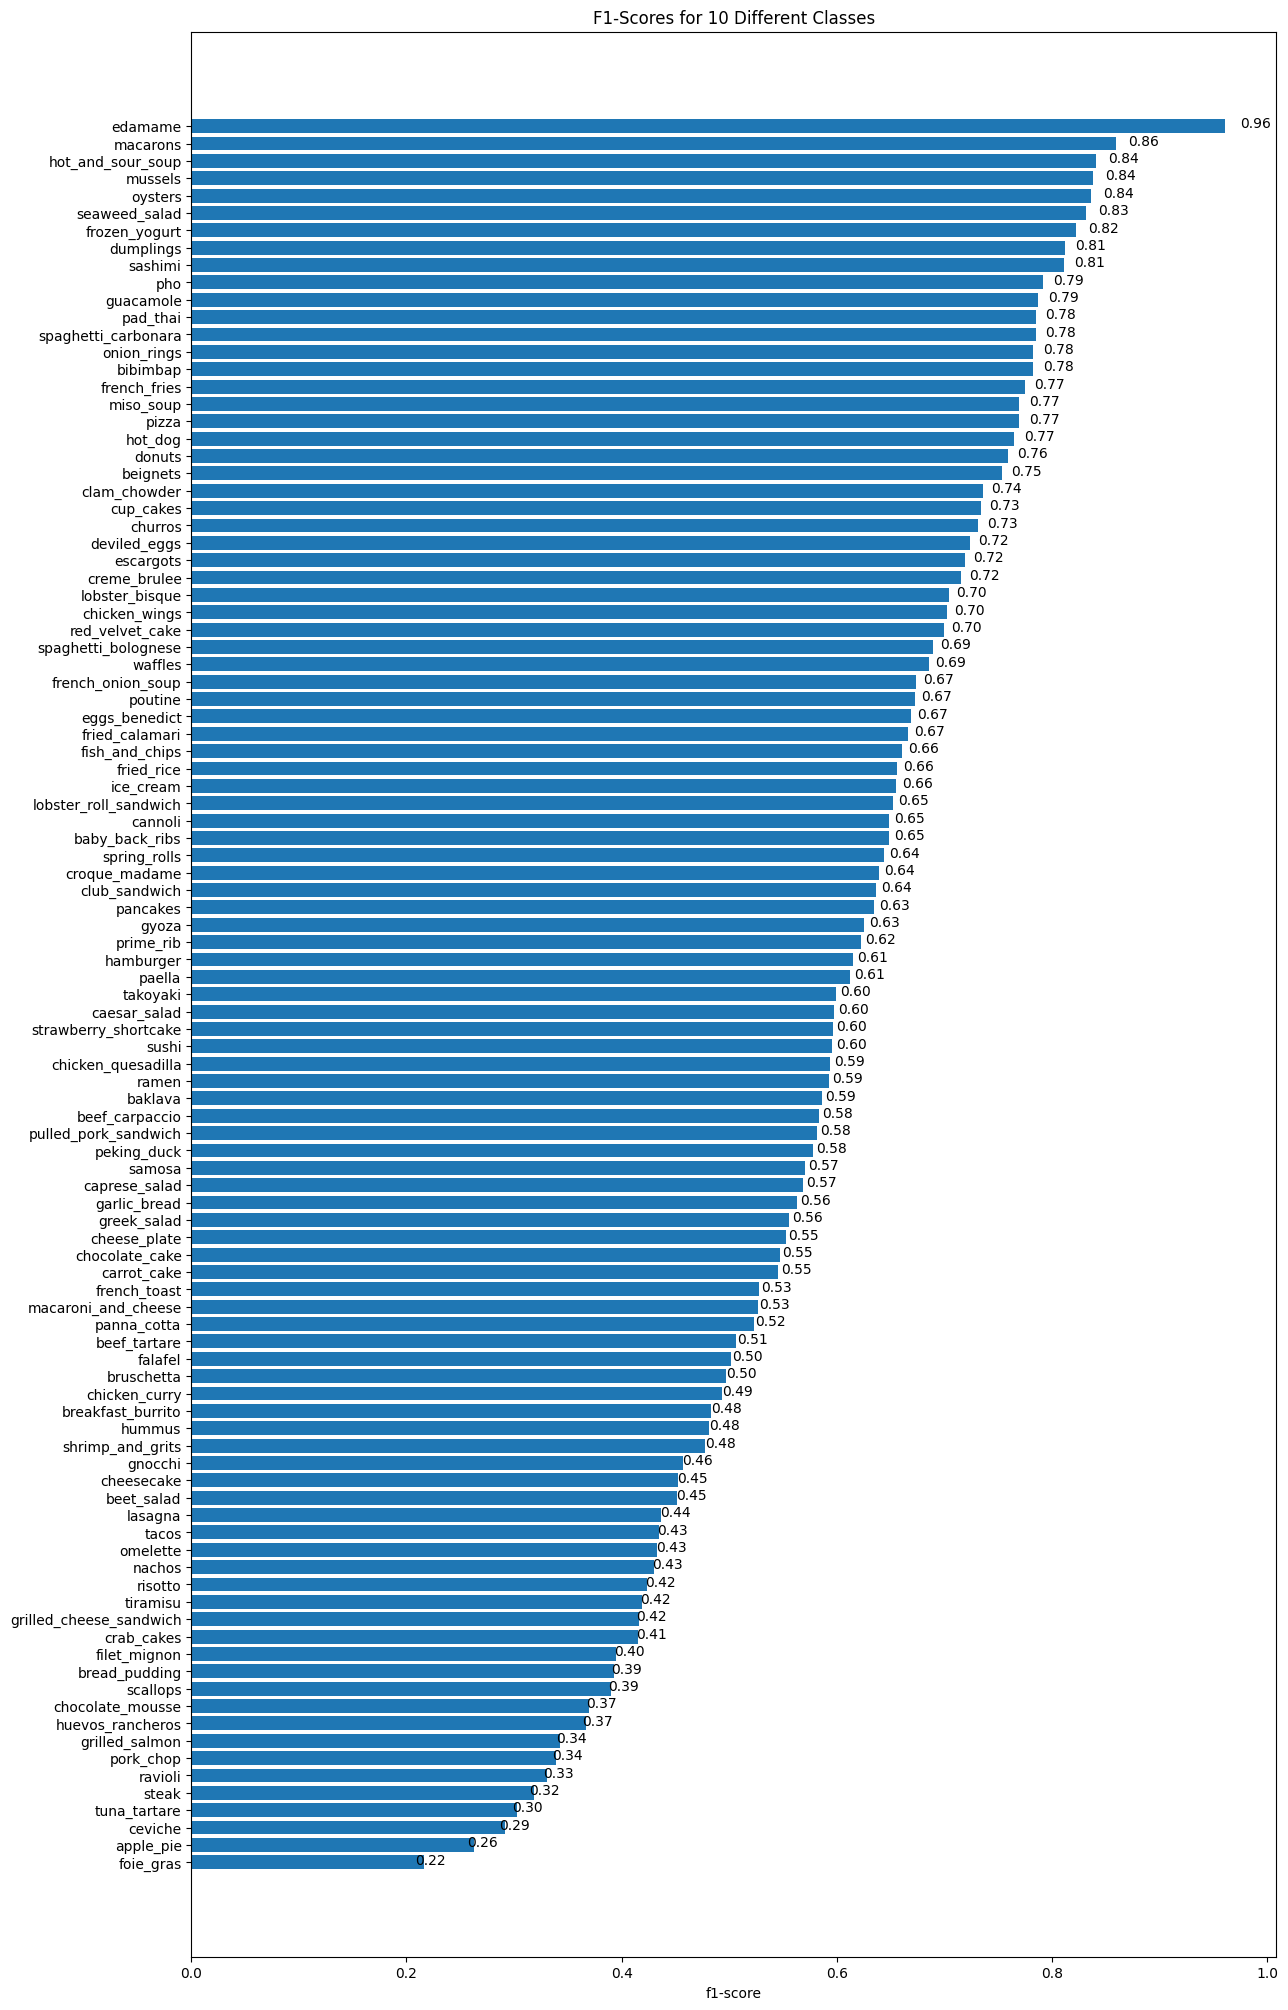

In [ ]:
import matplotlib.pyplot as plt

fig,ax =plt.subplots(figsize=(14,25))
scores= ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(list(f1_scores["class_name"]))
ax.set_xlabel("f1-score")
ax.set_title("F1-Scores for 10 Different Classes")
ax.invert_yaxis();

def autolabel(rects):
  for rect in rects:
    width= rect.get_width()
    ax.text(1.03 * width, rect.get_y() + rect.get_height()/1.2,
            f"{width:.2f}",
            ha='center',va='bottom')
autolabel(scores)

In [ ]:
def load_and_prep_image(filename,img_shape=224,scale=True):
  img = tf.io.read_file(filename)
  img = tf.io.decode_image(img)

  img = tf.image.resize(img,[img_shape,img_shape])
  if scale:
    return img / 255.
  else:
    return img

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


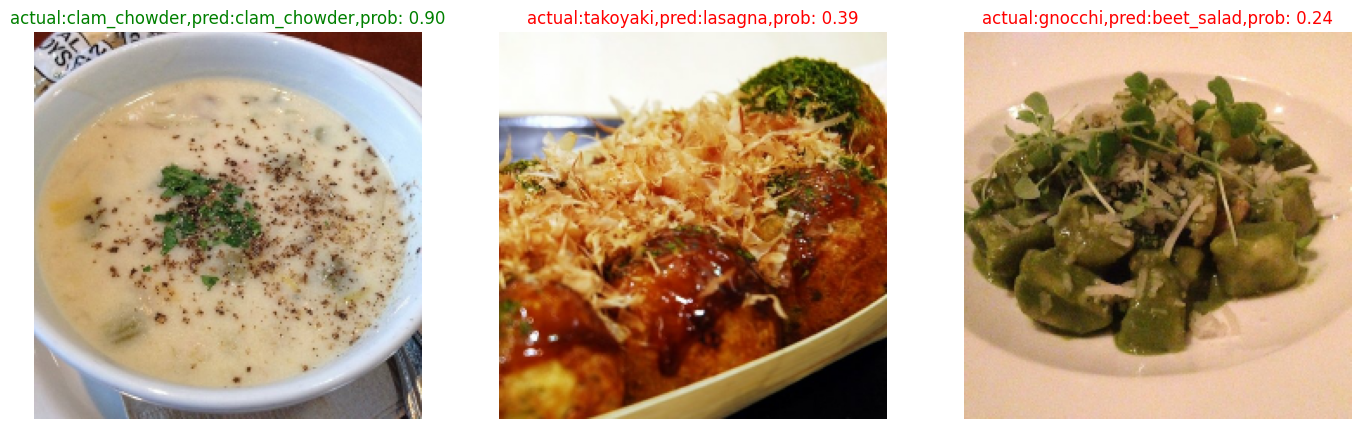

In [ ]:
import os
import random

plt.figure(figsize=(17,10))
for i in range(3):
  class_name = random.choice(class_names)
  filename = random.choice(os.listdir(test_dir + '/' +class_name))
  filepath = test_dir + class_name + '/' + filename

  img = load_and_prep_image(filepath,scale=False)
  pred_prob = model_0.predict(tf.expand_dims(img,axis=0))
  pred_class = class_names[pred_prob.argmax()]

  plt.subplot(1,3,i+1)
  plt.imshow(img/255.)
  if class_name == pred_class:
    title_color = 'g'
  else:
    title_color = 'r'
  plt.title(f'actual:{class_name},pred:{pred_class},prob: {pred_prob.max():.2f}',c=title_color)
  plt.axis(False);